### Practical: SQLite Database and Pandas (Solutions)

**Task 1**: Connect to the SQLite flight database (flight.db) and create a cursor object.

In [34]:
conn = sqlite3.connect("flights.db")

cur = conn.cursor()

**Task 2**: Find the longitude and latitude of all airports in the airports table and print the results for the first airport in the list.

In [36]:
coords = cur.execute(""" 
select cast(longitude as float), cast(latitude as float) 
from airports;""").fetchall()

print(coords[1])

(145.7887, -5.207083)


**Task 3:** Import the cartopy module and plot all airports on a map.

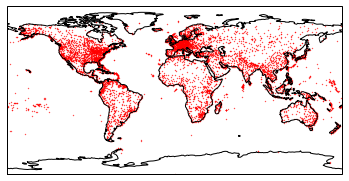

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

lon = []
lat = []

for x, y in coords:
   lon.append(x)
   lat.append(y)

ax = plt.axes(projection = ccrs.PlateCarree())
ax.scatter(lon, lat, s = 0.1, c = 'red')
ax.coastlines()

**Task 4**: Read the first 5 rows of the airlines table from the database into a pandas DataFrame and display that DataFrame. 

In [38]:
df = pd.read_sql_query("select * from airlines limit 5;", conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


**Task 5**: Insert a new row of your choice into the airlines table, commit the transaction, and verity that the row has been added to that table in the database.

In [39]:
cur.execute("insert into airlines values (6048, 19846, 'Test flight', '', '', null, null, null, 'Y')")

conn.commit()

pd.read_sql_query("select * from airlines where id=19846;", conn)

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19846,Test flight,,,None,None,None,Y


**Task 6**: Update the inserted row in Task 5 with information of your choice, commit the transaction and very the result.

In [41]:
values = ('USA', 19846)

cur.execute("update airlines set country=? where id=?", values)

conn.commit()

pd.read_sql_query("select * from airlines where id = 19846;", conn)

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19846,Test flight,,,None,None,USA,Y


**Task 7**: Delete the inserted row again and verify the result.

In [42]:
values = (19846, )

cur.execute("delete from airlines where id=?", values)

conn.commit()

pd.read_sql_query("select * from airlines where id=19846;", conn)

,index,id,name,alias,iata,icao,callsign,country,active


**Task 8**: Create a pandas DataFrame that contains five columns: 'id', 'departure', 'arrival', 'number', and 'route_id' with suitable values and convert this dataframe into a new database table with the name 'daily_flights', and verify the result.

In [44]:
from datetime import datetime

df = pd.DataFrame(
[[1, datetime(2020, 9, 29, 0, 0) ,
datetime(2020, 9, 29, 12, 0), 'T1', 1]],
columns=["id", "departure", "arrival", "number", "route_id"])

df.to_sql("daily_flights", conn, if_exists="replace")

pd.read_sql_query("select * from daily_flights;", conn)

,index,id,departure,arrival,number,route_id
0,0,1,2020-09-29 00:00:00,2020-09-29 12:00:00,T1,1


**Task 9**: Add an additional column with the name 'delay_minutes' to the database table 'delay_flights'.

In [45]:
cur.execute("alter table daily_flights add column delay_minutes integer;")

pd.read_sql_query("select * from daily_flights limit 1;", conn)

,index,id,departure,arrival,number,route_id,delay_minutes
0,0,1,2020-09-29 00:00:00,2020-09-29 12:00:00,T1,1,None


**Task 10**: Read the database table 'daily_flights' into a pandas DataFrame, replace 'None' in the 'delay_minutes' column by '20', export the DataFrame into the database, and verify the result.

In [46]:
df = pd.read_sql("select * from daily_flights", conn)
df["delay_minutes"] = 20
df.to_sql("daily_flights", conn, if_exists="replace")

pd.read_sql_query("select * from daily_flights limit 1;", conn)

,level_0,index,id,departure,arrival,number,route_id,delay_minutes
0,0,0,1,2020-09-29 00:00:00,2020-09-29 12:00:00,T1,1,20
